# Mini-projet : classification de tumeurs à partir de données d'expression de gènes

Dans ce jeu de données, chaque observation est une tumeur, décrite par l'expression de 3 000 gènes. L'expression d'un gène est une mesure de la quantité d'ARN correspondant à ce gène qui est présente dans la cellule. Schématiquement, l'ADN est transcrit en ARN, lequel est lui-même traduit en une protéine. Les protéines assurent une multitude de fonctions du vivant, mais mesurer leur quantité est difficile ; d'où l'intérêt d'utiliser les quantités d'ARN, bien que la correspondance ne soit pas immédiate. 

Chaque tumeur de notre jeu de données est étiquetée selon qu'il s'agit d'une tumeur du sein ou d'une tumeur de l'ovaire. 

Le but de ce projet est de construire un classifieur binaire qui détermine, sur la base de l'expression de ces 3 000 gènes, si une tumeur est une tumeur du sein ou de l'ovaire.

## Instructions
1. Séparez les données en un jeu d'entraînement (90% des données) et un jeu de test.
2. Standardisez les données sur le jeu d'entraînement en utilisant `StandardScaler()` du [module preprocessing](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing).
3. Utilisez une validation croisée pour sélectionner les meilleurs hyperparamètres d'au moins deux algorithmes d'apprentissage et comparer leurs performances. Attention à choisir une mesure de performance appropriée.
4. En conclure un modèle final et évaluer ses performances sur le jeu de test.

N'oubliez pas de commenter et interpréter vos résultats.

Results and Analysis:
1.   Logistic Regression: Accuracy on test data = 0.93
2.   SVM with Linear Kernel: Accuracy on test data = 0.95
3.   SVM with RBF Kernel: Accuracy on test data = 0.7
4.   SVM with RBF Kernel: Accuracy on test data = 0.7
5.   Decision Tree: Accuracy on test data = 0.96
6.   Random Forest: Accuracy on test data = 0.92

Three algorithms are yielding very good results here: logistic regression, Linear SVM and Decision Trees.

We might pick any one of the three algorithms, we choose to implement a decision tree or a linear SVM for robustness and accuracy reasons.


 

## Chargement des données

In [1]:
import pandas as pd

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
bvo_df = pd.read_csv('https://raw.githubusercontent.com/andgiete/ML-CancerPrediction-Project/master/small_Breast_Ovary.csv')

The first column ("ID_REF") contains the sample ID, the last one ("Tissue") the "Breast" or "Ovary" label, and all others are gene expressions.

### Transformation des données en array numpy

In [4]:
# design matrix
X = np.array(bvo_df.drop(columns=["ID_REF", "Tissue"]))

In [5]:
X.shape

(542, 3000)

We have 542 samples, each represented by 3000 gene expressions.

In [8]:
n_features = X.shape[1]

In [7]:
# target array
y = np.array(bvo_df["Tissue"])

# convert "Breast" in 0 and the other labels (here, "Ovarian") into 1
y = np.where(y=='Breast', 0, 1)

In [ ]:
y.shape

(542,)

In [13]:
# Splitting data between train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=.1, 
                                                    random_state=21)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (487, 3000)
X_test shape: (55, 3000)
y_train shape: (487,)
y_test shape: (55,)


In [15]:
# Scaling data 
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = std_scale.transform(X_train)
X_test_scaled = std_scale.transform(X_test)

In [17]:
# Applying Logistic Regression

from sklearn.linear_model import LogisticRegression

C = 2
penalty='l2'
lreg = LogisticRegression(penalty=penalty, C=C, max_iter=200)
lreg.fit(X_train,y_train)

score = lreg.score(X_test, y_test)
print(f'Accuracy on test data: {score}')


Accuracy on test data: 0.9272727272727272


In [22]:
list(numpy.arange(0.0,6.5,0.5))

[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0]

In [24]:
# Cross validation on logistic regression
from sklearn.model_selection import GridSearchCV

param_grid = [
  {'penalty': ['l1', 'l2', 'elasticnet', 'none'], 
   'C': list(numpy.arange(0.0,6.5,0.5)) }
 ]
print(param_grid)

lreg_grid = GridSearchCV( lreg, param_grid, cv=3, scoring='accuracy') 
    
lreg_grid.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(lreg_grid.best_params_)
print()
score = lreg_grid.score(X_test, y_test)
print("Acuracy (on test set) = ", score)

[{'penalty': ['l1', 'l2', 'elasticnet', 'none'], 'C': [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0]}]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:935: RuntimeWarning: divide by zero encountered in double_scalars
  args=(X, target, 1. / C, sample_weight),
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:124: RuntimeWarning: invalid value encountered in double_scalars
  out = -np.sum(sample_weight * log_logistic(yz)) + .5 * alpha * np.dot(w, w)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:129: RuntimeWarning: invalid value encountered in multiply
  grad[:n_features] = safe_sparse_dot(X.T, z0) + alpha * w
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarn

Best parameters set found on development set:

{'C': 0.5, 'penalty': 'l2'}

Acuracy (on test set) =  0.9272727272727272


In [27]:
# Applying SVM with linear Kernel
from sklearn import svm

lsvm = svm.SVC(kernel='linear', C=1000)

lsvm.fit(X_train, y_train)

score = lsvm.score(X_test, y_test)
print(f'Accuracy on test data: {score}')



Accuracy on test data: 0.9454545454545454


In [29]:
# Cross validation on linear SVM

param_grid = [
  { 'C': list(range(20,1000,20)) }
 ]
print(param_grid)

lsvm_grid = GridSearchCV( lsvm, param_grid, cv=3, scoring='accuracy') 
    
lsvm_grid.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(lsvm_grid.best_params_)
print()
score = lsvm_grid.score(X_test, y_test)
print("Acuracy (on test set) = ", score)


[{'C': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500, 520, 540, 560, 580, 600, 620, 640, 660, 680, 700, 720, 740, 760, 780, 800, 820, 840, 860, 880, 900, 920, 940, 960, 980]}]
Best parameters set found on development set:

{'C': 20}

Acuracy (on test set) =  0.9454545454545454


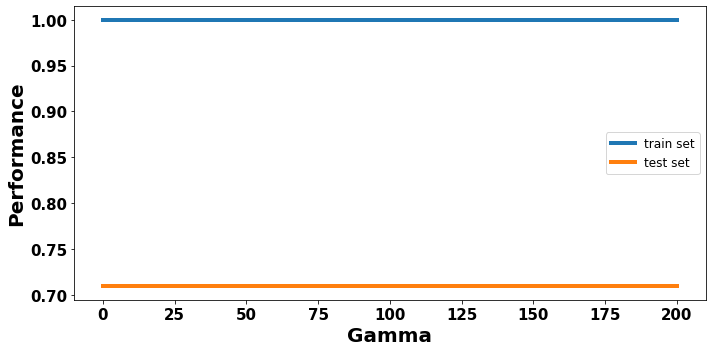

In [33]:
# Applying SVM with RBF Kernel

gamma_range = np.linspace(0.01, 200, 20)

acc_train, acc_test = list(), list()
gamma_range = np.linspace(0.01, 200, 20)
for param in gamma_range:
    clf = svm.SVC(kernel='rbf', C=20, gamma=param)
    clf.fit(X_train_scaled, y_train)
    acc_train.append(clf.score(X_train_scaled, y_train))
    acc_test.append(clf.score(X_test_scaled, y_test))

plt.figure(figsize=(10, 5))

# plot train and test scores for different gamma values
plt.plot(gamma_range, acc_train, label='train set', lw=4)
plt.plot(gamma_range, acc_test, label='test set', lw=4)

# add a legend
plt.legend(loc='best', fontsize=12)

# format the plot
plt.xlabel("Gamma", fontweight="bold", fontsize=20)
plt.ylabel("Performance", fontweight="bold", fontsize=20)
plt.xticks(fontweight="bold", fontsize=15)
plt.yticks(fontweight="bold", fontsize=15)
plt.tight_layout()

plt.show()


In [35]:
# Applying Decision Trees
from sklearn import tree

dec_tree = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=6, 
                                  min_samples_split=5, min_samples_leaf=2, 
                                  min_weight_fraction_leaf=0.0, max_features=None, 
                                  random_state=None, max_leaf_nodes=None, 
                                  min_impurity_split=1e-07, class_weight=None, presort=False)
dec_tree = dec_tree.fit(X_train, y_train)


# Evaluate acuracy on test data
print(dec_tree)
score = dec_tree.score(X_test, y_test)
print("Acuracy (on test set) = ", score)

/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=1e-07,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
Acuracy (on test set) =  0.9636363636363636


In [36]:
# Cross validation on Decision Tree

param_grid = [
  {'max_depth': [1,2,3,4,5,6,7,8,9], 
   'min_samples_split':[1,2,3,4,5,6,7,8,9],
   'criterion': ['gini','entropy'] }
 ]
print(param_grid)

tree_grid = GridSearchCV( dec_tree, param_grid, cv=3, scoring='accuracy') 
    
tree_grid.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(tree_grid.best_params_)
print()
score = tree_grid.score(X_test, y_test)
print("Acuracy (on test set) = ", score)

[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'criterion': ['gini', 'entropy']}]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

Best parameters set found on development set:

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 7}

Acuracy (on test set) =  0.8363636363636363


In [57]:
# Applying Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=75, criterion='gini', max_depth=6,
                             min_samples_split=2, min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, max_features='auto', 
                             max_leaf_nodes=None, min_impurity_split=1e-07, bootstrap=True, 
                             oob_score=False, n_jobs=1, random_state=None, 
                             verbose=0, warm_start=False, class_weight=None)
rf = rf.fit(X_train, y_train)
print("n_estimators=", rf.n_estimators, " max_depth=",rf.max_depth,
      "max_features=", rf.max_features)

print(rf)
score = rf.score(X_test, y_test)
print("Acuracy (on test set) = ", score)

/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is depr

n_estimators= 75  max_depth= 6 max_features= auto
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=1e-07,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=75, n_jobs=1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
Acuracy (on test set) =  0.9272727272727272


/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is depr

In [40]:
# Cross Validation on Random Forest

from sklearn.model_selection import GridSearchCV

param_grid = [
  {'max_depth': [None,1,2,3,4,5,6,7,8,9], 
   'n_estimators':[1,5,10,15,25,50,75,100],
   'max_features': ['auto', 'sqrt', 'log2'] }
 ]
print(param_grid)

# Cross-validation grid-search (for finding best possible accuracy)
randomforestgrid = GridSearchCV( rf, param_grid, cv=3, scoring='accuracy') 
# NOTE THAT YOU CAN USE OTHER VALUE FOR cv (# of folds) and OTHER SCORING CRITERIA OTHER THAN 'accuracy'
    
randomforestgrid.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(randomforestgrid.best_params_)
print()
score = randomforestgrid.score(X_test, y_test)
print("Acuracy (on test set) = ", score)

[{'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'n_estimators': [1, 5, 10, 15, 25, 50, 75, 100], 'max_features': ['auto', 'sqrt', 'log2']}]


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:301: Futu

Best parameters set found on development set:

{'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 75}

Acuracy (on test set) =  0.9272727272727272


/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is depr